## MINI PROJECT - DATA ANALYTICS

> ### OBJECTIVE:
> - To demonstrate practical skills in data preprocessing and descriptive analysis.
>
> ### DATASET:
> - The Melbourne Housing Market dataset, available at [Kaggle - Melbourne Housing](https://www.kaggle.com/datasets/anthonypino/melbourne-housing-market/data).

### BACKGROUND

Melbourne is currently experiencing a housing bubble (some experts say it may burst soon). Maybe you can find a trend to this matter? Which suburbs are the best to buy in? Which ones are value for money? Where's the expensive side of town? And more importantly where should you buy a 2 bedroom unit?

### CONTENT & ACKNOWLEDGEMENTS
This data was scraped from publicly available results posted every week from Domain.com.au, it's cleaned, but you should check it properly to make sure the data analysis is valid.

The dataset includes Address, Type of Real estate, Suburb, Method of Selling, Rooms, Price, Real Estate Agent, Date of Sale and distance from C.B.D.

### DATA DICTIONARY AND KEY DETAILS

- **Suburb:** Suburb
- **Address:** Address
- **Rooms:** Number of rooms
- **Price:** Price in Australian dollars

- **Method:**
**S** - property sold;
**SP** - property sold prior;
**PI** - property passed in;
**PN** - sold prior not disclosed;
**SN** - sold not disclosed;
**NB** - no bid;
**VB** - vendor bid;
**W** - withdrawn prior to auction;
**SA** - sold after auction;
**SS** - sold after auction price not disclosed.
**N/A** - price or highest bid not available.

- **Type:**
**br** - bedroom(s);
**h** - house,cottage,villa, semi,terrace;
**u** - unit, duplex;
**t** - townhouse;
**dev site** - development site;
**o res** - other residential.

- **SellerG:** Real Estate Agent
- **Date:** Date sold
- **Distance:** Distance from CBD in Kilometres
- **Regionname:** General Region (West, North West, North, North east …etc)
- **Propertycount:** Number of properties that exist in the suburb.
- **Bedroom2:** Scraped # of Bedrooms (from different source)
- **Bathroom:** Number of Bathrooms
- **Car:** Number of carspots
- **Landsize:** Land Size in Metres
- **BuildingArea:** Building Size in Metres
- **YearBuilt:** Year the house was built
- **CouncilArea:** Governing council for the area
- **Lattitude:** Self explanitory
- **Longtitude:** Self explanitory

### 1. DATA QUALITY ASSESSMENT
> Load the dataset into a suitable data structure.
>
> Perform an initial inspection of the dataset, and identify:
> - Number of rows and columns.
> - Data types of each column.
> - Missing values of each column.
> - Any initial observations or issues you notice (if any).

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = "data/Melbourne_Housing.csv"

df = pd.read_csv(data)

In [3]:
print("Rows x Column:", df.shape)

Rows x Column: (13580, 21)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [5]:
df.isna().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [6]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


### 2. DATA TYPE TRANSFORMATION
> Identify columns that are not of the appropriate data type:
> - Suggest a more suitable data type for these columns.
> - Transform the identified columns to the suggested data types.

In [7]:
df.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [8]:
df['Date'] = pd.to_datetime(df['Date'])

In [9]:
df['Postcode'] = df['Postcode'].astype('int64')

In [10]:
df['Bedroom2'] = df['Bedroom2'].astype('int64')

In [11]:
df['Bathroom'] = df['Bathroom'].astype('int64')

In [12]:
df['Landsize'] = df['Landsize'].astype('int64')

In [13]:
df['Propertycount'] = df['Propertycount'].astype('int64')

In [14]:
df.dtypes

Suburb                   object
Address                  object
Rooms                     int64
Type                     object
Price                   float64
Method                   object
SellerG                  object
Date             datetime64[ns]
Distance                float64
Postcode                  int64
Bedroom2                  int64
Bathroom                  int64
Car                     float64
Landsize                  int64
BuildingArea            float64
YearBuilt               float64
CouncilArea              object
Lattitude               float64
Longtitude              float64
Regionname               object
Propertycount             int64
dtype: object

### 3. MISSING VALUES HANDLING
> For each missing values in each column:
> - Identify any columns that have missing values, you can also show the number and percentage of missing values.
> - Propose and justify your chosen method(s) for handling the missing values in each column.
> - Implement your chosen method(s) to handle the missing values.

In [15]:
print("Number of missing values:\n")
print(df.isna().sum())

Number of missing values:

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64


In [16]:
print("Percentage of missing values:\n")
(df.isnull().mean() * 100).round(2).astype(str) + '%'

Percentage of missing values:



Suburb             0.0%
Address            0.0%
Rooms              0.0%
Type               0.0%
Price              0.0%
Method             0.0%
SellerG            0.0%
Date               0.0%
Distance           0.0%
Postcode           0.0%
Bedroom2           0.0%
Bathroom           0.0%
Car               0.46%
Landsize           0.0%
BuildingArea      47.5%
YearBuilt        39.58%
CouncilArea      10.08%
Lattitude          0.0%
Longtitude         0.0%
Regionname         0.0%
Propertycount      0.0%
dtype: object

In [17]:
df[['Car', 'BuildingArea', 'YearBuilt', 'CouncilArea']].describe()

,Car,BuildingArea,YearBuilt
count,13518.000000,7130.000000,8205.000000
mean,1.610075,151.967650,1964.684217
std,0.962634,541.014538,37.273762
min,0.000000,0.000000,1196.000000
25%,1.000000,93.000000,1940.000000
50%,2.000000,126.000000,1970.000000
75%,2.000000,174.000000,1999.000000
max,10.000000,44515.000000,2018.000000


In [18]:
df['Car'].fillna(0, inplace=True)

In [19]:
df[['BuildingArea']] = df[['BuildingArea']].fillna(round(df['BuildingArea'].mean(), 2))

In [20]:
df['YearBuilt'] = df['YearBuilt'].fillna(df['YearBuilt'].median())

In [21]:
df = df.dropna(subset=['CouncilArea'])

In [22]:
df.isna().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

In [23]:
df = df[df['YearBuilt'] != 1196]

In [24]:
print(df.shape)

(12210, 21)


### 4. DETECTING AND HANDLING OUTLIERS
> Using suitable techniques, identify columns that have outliers:
> - Report these columns and the number of outliers detected.
> - Propose a strategy to handle the outliers. Justify your choice of strategy.
> - Implement the chosen strategies to handle the outliers.

In [25]:
df_num = df.select_dtypes(include = ['int64','float64'])

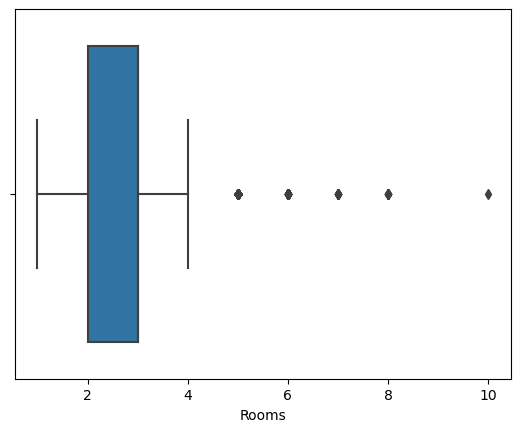

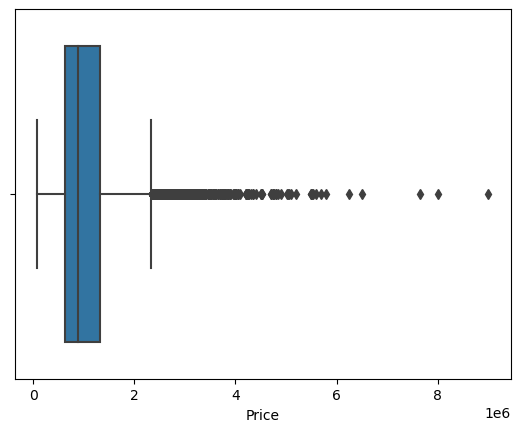

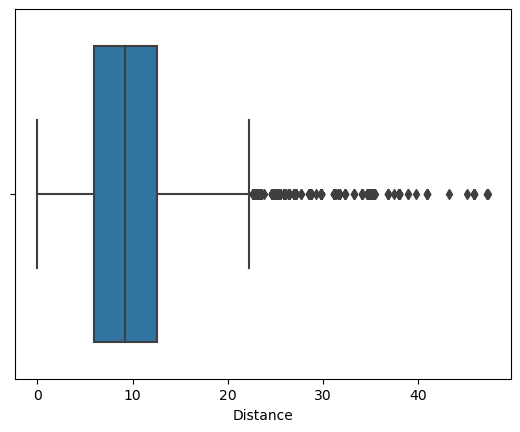

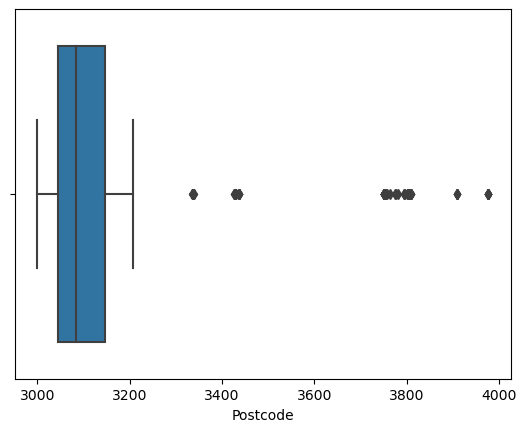

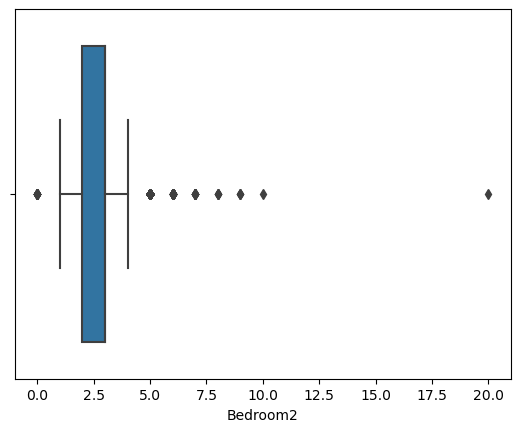

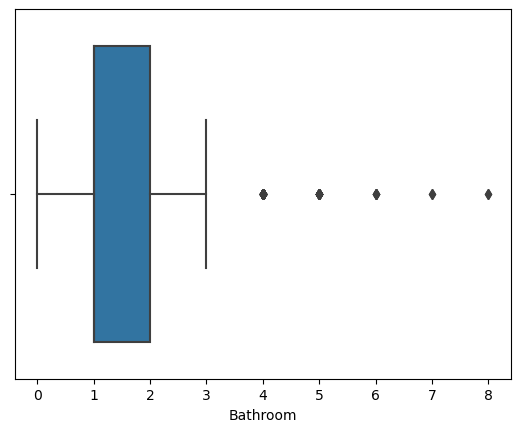

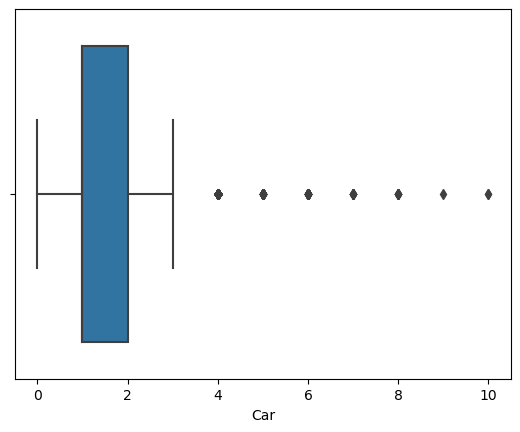

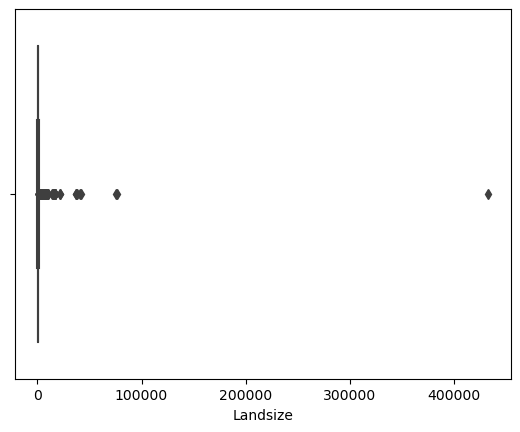

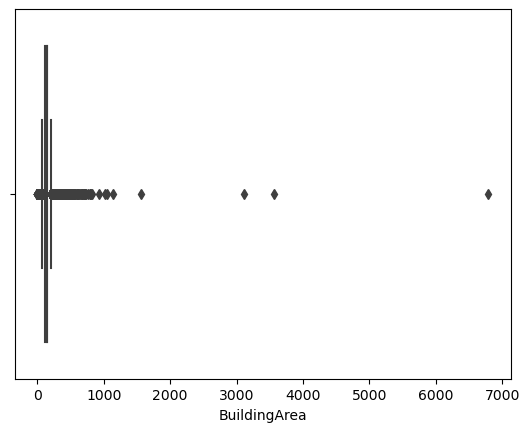

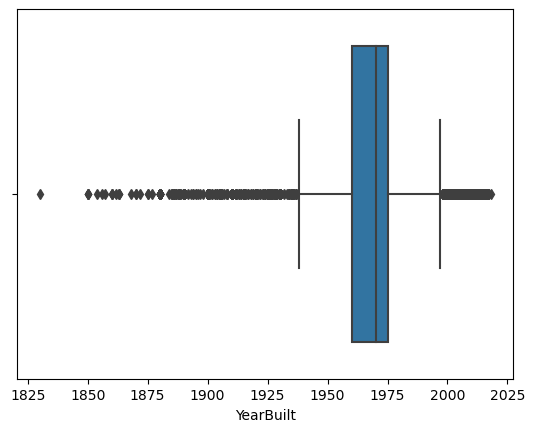

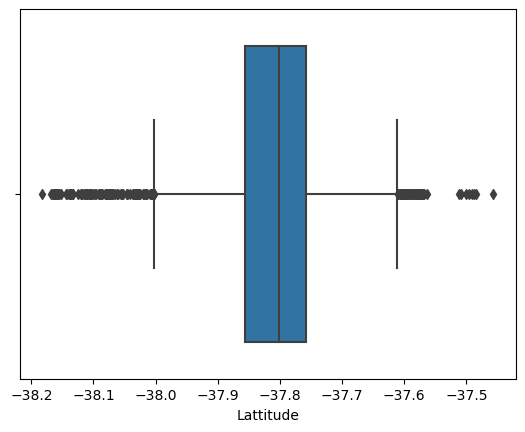

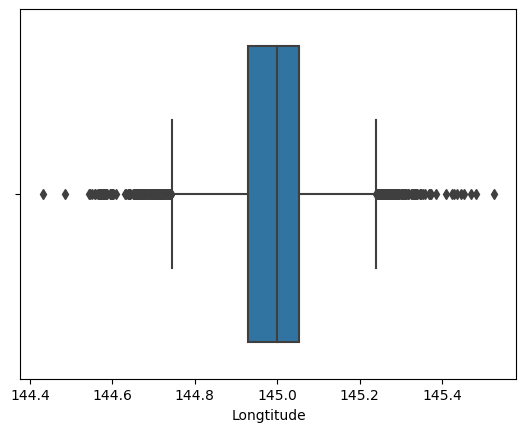

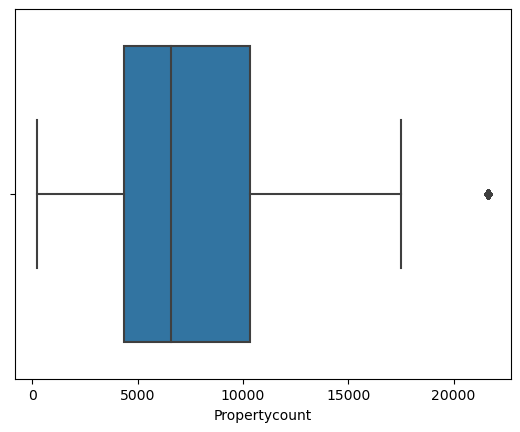

In [26]:
for i in df_num:
    sns.boxplot(data = df_num, x=i)
    plt.show()

In [27]:
def find_outliers(yourlist):
    Q1 = np.quantile(yourlist, .25)
    Q2 = np.quantile(yourlist, .50)
    Q3 = np.quantile(yourlist, .75)
    
    IQR = (Q3 - Q1) * 1.5
    batas_bawah = Q1 - IQR
    batas_atas = Q3 + IQR
    
    outlier = ''
    
    for i in range(len(yourlist)):
        if yourlist[i] > batas_atas:
            outlier = outlier + str(yourlist[i]) + ', '
        if yourlist[i] < batas_bawah:
            outlier = outlier + str(yourlist[i]) + ', '
    return outlier

In [28]:
Rooms = df['Rooms'].sort_values().values.tolist()
print('Jumlah outlier feature Rooms yaitu:', len(find_outliers(Rooms)))

Jumlah outlier feature Rooms yaitu: 1750


In [29]:
Price = df['Price'].sort_values().values.tolist()
print('Jumlah outlier feature Price yaitu:', len(find_outliers(Price)))

Jumlah outlier feature Price yaitu: 5995


In [30]:
Distance = df['Distance'].sort_values().values.tolist()
print('Jumlah outlier feature Distance yaitu:', len(find_outliers(Distance)))

Jumlah outlier feature Distance yaitu: 2160


In [31]:
Postcode = df['Postcode'].sort_values().values.tolist()
print('Jumlah outlier feature Postcode yaitu:', len(find_outliers(Postcode)))

Jumlah outlier feature Postcode yaitu: 900


In [32]:
Bedroom2 = df['Bedroom2'].sort_values().values.tolist()
print('Jumlah outlier feature Bedroom2 yaitu:', len(find_outliers(Bedroom2)))

Jumlah outlier feature Bedroom2 yaitu: 1670


In [33]:
Bathroom = df['Bathroom'].sort_values().values.tolist()
print('Jumlah outlier feature Bathroom yaitu:', len(find_outliers(Bathroom)))

Jumlah outlier feature Bathroom yaitu: 381


In [34]:
Car = df['Car'].sort_values().values.tolist()
print('Jumlah outlier feature Car yaitu:', len(find_outliers(Car)))

Jumlah outlier feature Car yaitu: 2752


In [35]:
BuildingArea = df['BuildingArea'].sort_values().values.tolist()
print('Jumlah outlier feature BuildingArea yaitu:', len(find_outliers(BuildingArea)))

Jumlah outlier feature BuildingArea yaitu: 12782


In [36]:
YearBuilt = df['YearBuilt'].sort_values().values.tolist()
print('Jumlah outlier feature YearBuilt yaitu:', len(find_outliers(YearBuilt)))

Jumlah outlier feature YearBuilt yaitu: 29160


In [37]:
Lattitude = df['Lattitude'].sort_values().values.tolist()
print('Jumlah outlier feature Lattitude yaitu:', len(find_outliers(Lattitude)))

Jumlah outlier feature Lattitude yaitu: 2123


In [38]:
Longtitude = df['Longtitude'].sort_values().values.tolist()
print('Jumlah outlier feature Longtitude yaitu:', len(find_outliers(Longtitude)))

Jumlah outlier feature Longtitude yaitu: 4089


In [39]:
Propertycount = df['Propertycount'].sort_values().values.tolist()
print('Jumlah outlier feature Propertycount yaitu:', len(find_outliers(Propertycount)))

Jumlah outlier feature Propertycount yaitu: 2261


In [40]:
# function to find outliers,using numpy
def find_outliers2(data):
    # hitung nilai q1 dan q3
    Q1 = np.quantile(data, .25)
    Q3 = np.quantile(data, .75)
    
    # hitung nilai IQR
    IQR = Q3 - Q1
    min_iqr = Q1 - 1.5 * IQR
    max_iqr = Q3 + 1.5 * IQR
    
    low_out = []
    high_out = []
    
    for i in data:
        if (i < min_iqr):
            low_out.append(i)
        if (i > max_iqr):
            high_out.append(i)
    return print('Lower outlier: ', low_out, ' || Higher outlier: ', high_out)

In [41]:
print(find_outliers2(Rooms))

Lower outlier:  []  || Higher outlier:  [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,

In [42]:
print(find_outliers2(Price))

Lower outlier:  []  || Higher outlier:  [2345000.0, 2345000.0, 2345000.0, 2345000.0, 2350000.0, 2350000.0, 2350000.0, 2350000.0, 2350000.0, 2350000.0, 2350000.0, 2350000.0, 2350000.0, 2352500.0, 2355000.0, 2355000.0, 2355000.0, 2360000.0, 2360000.0, 2360000.0, 2360000.0, 2361000.0, 2365000.0, 2365000.0, 2367000.0, 2368000.0, 2370000.0, 2370000.0, 2370000.0, 2375000.0, 2375000.0, 2375000.0, 2375000.0, 2375000.0, 2376000.0, 2380000.0, 2380000.0, 2381000.0, 2385000.0, 2385000.0, 2385000.0, 2390000.0, 2395000.0, 2400000.0, 2400000.0, 2400000.0, 2400000.0, 2400000.0, 2400000.0, 2400000.0, 2400000.0, 2400000.0, 2400000.0, 2400000.0, 2400000.0, 2400000.0, 2400000.0, 2400000.0, 2400000.0, 2400000.0, 2400000.0, 2400000.0, 2400000.0, 2400000.0, 2400000.0, 2400000.0, 2400000.0, 2400000.0, 2400000.0, 2402500.0, 2405000.0, 2405000.0, 2405000.0, 2408000.0, 2410000.0, 2410000.0, 2410000.0, 2412000.0, 2415000.0, 2415000.0, 2415000.0, 2420000.0, 2425000.0, 2425000.0, 2425000.0, 2425000.0, 2425000.0, 24

In [43]:
print(find_outliers2(Distance))

Lower outlier:  []  || Higher outlier:  [22.7, 22.7, 22.7, 22.7, 22.7, 22.7, 22.7, 22.7, 22.7, 22.7, 22.7, 22.7, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.2, 23.2, 23.2, 23.2, 23.2, 23.2, 23.2, 23.2, 23.2, 23.2, 23.2, 23.2, 23.2, 23.2, 23.2, 23.2, 23.2, 23.3, 23.3, 23.3, 23.3, 23.5, 23.5, 23.5, 23.5, 23.5, 23.5, 23.5, 23.5, 23.5, 23.5, 23.8, 24.7, 24.7, 24.7, 24.7, 24.7, 24.7, 24.7, 24.7, 24.7, 24.7, 24.7, 24.7, 24.7, 24.7, 24.7, 24.7, 24.7, 24.7, 24.7, 24.7, 24.7, 24.7, 24.7, 24.7, 24.8, 24.8, 24.8, 24.8, 24.8, 24.8, 24.8, 24.8, 24.8, 24.8, 24.8, 24.8, 24.8, 24.8, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.2, 25.2, 25.2, 25.2, 25.2, 25.2, 25.2, 25.2, 25.2, 25.2, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.9, 25.9, 25.9, 25.9, 25.9, 25.9, 25.9, 25.9, 25.9, 26.0, 26.1, 26.5, 26.5, 26.5, 26.5, 26.5,

In [44]:
print(find_outliers2(Postcode))

Lower outlier:  []  || Higher outlier:  [3335, 3337, 3337, 3337, 3337, 3337, 3337, 3337, 3337, 3337, 3337, 3337, 3337, 3337, 3337, 3337, 3337, 3337, 3338, 3338, 3338, 3338, 3338, 3338, 3338, 3338, 3338, 3338, 3338, 3338, 3338, 3338, 3338, 3338, 3340, 3427, 3427, 3429, 3429, 3429, 3429, 3429, 3429, 3429, 3429, 3429, 3429, 3429, 3429, 3429, 3429, 3429, 3429, 3429, 3431, 3437, 3437, 3437, 3437, 3437, 3437, 3750, 3750, 3750, 3750, 3750, 3750, 3752, 3752, 3752, 3752, 3752, 3752, 3752, 3752, 3752, 3752, 3752, 3752, 3752, 3752, 3752, 3752, 3752, 3752, 3754, 3754, 3754, 3754, 3754, 3754, 3754, 3754, 3754, 3757, 3765, 3775, 3777, 3782, 3795, 3795, 3796, 3802, 3802, 3802, 3802, 3802, 3803, 3803, 3803, 3803, 3805, 3805, 3805, 3805, 3805, 3805, 3806, 3806, 3806, 3806, 3806, 3806, 3806, 3806, 3806, 3806, 3806, 3807, 3807, 3808, 3809, 3810, 3810, 3810, 3910, 3910, 3910, 3910, 3910, 3976, 3976, 3976, 3977, 3977, 3977, 3977, 3977, 3977, 3977]
None


In [45]:
print(find_outliers2(Bedroom2))

Lower outlier:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]  || Higher outlier:  [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5

In [46]:
print(find_outliers2(Bathroom))

Lower outlier:  []  || Higher outlier:  [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 7, 7, 8, 8]
None


In [47]:
print(find_outliers2(Car))

Lower outlier:  []  || Higher outlier:  [4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0,

In [48]:
print(find_outliers2(BuildingArea))

Lower outlier:  [0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 4.0, 4.0, 5.0, 5.0, 5.0, 7.0, 9.0, 10.0, 11.0, 12.0, 13.0, 13.0, 14.0, 14.0, 15.0, 15.0, 16.0, 16.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 19.0, 20.0, 20.0, 20.0, 21.0, 22.0, 22.0, 25.0, 25.0, 26.0, 26.0, 27.0, 27.0, 28.0, 28.0, 28.0, 29.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.6, 32.0, 32.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 34.0, 34.0, 34.0, 34.0, 34.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.64, 36.0, 36.0, 36.0, 36.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 39.0, 39.0, 39.0, 39.0, 39.5, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 42.0, 42.0, 42.0, 42.0,

In [49]:
print(find_outliers2(YearBuilt))

Lower outlier:  [1830.0, 1850.0, 1850.0, 1850.0, 1850.0, 1854.0, 1856.0, 1857.0, 1860.0, 1860.0, 1860.0, 1862.0, 1863.0, 1863.0, 1863.0, 1868.0, 1870.0, 1870.0, 1872.0, 1875.0, 1875.0, 1877.0, 1880.0, 1880.0, 1880.0, 1880.0, 1880.0, 1880.0, 1880.0, 1880.0, 1880.0, 1880.0, 1880.0, 1880.0, 1880.0, 1880.0, 1880.0, 1880.0, 1880.0, 1880.0, 1880.0, 1880.0, 1880.0, 1880.0, 1880.0, 1880.0, 1880.0, 1880.0, 1880.0, 1880.0, 1880.0, 1880.0, 1880.0, 1880.0, 1880.0, 1880.0, 1880.0, 1880.0, 1880.0, 1880.0, 1880.0, 1880.0, 1880.0, 1880.0, 1880.0, 1880.0, 1880.0, 1880.0, 1880.0, 1880.0, 1880.0, 1880.0, 1880.0, 1880.0, 1880.0, 1880.0, 1880.0, 1880.0, 1880.0, 1880.0, 1880.0, 1880.0, 1880.0, 1880.0, 1880.0, 1880.0, 1880.0, 1880.0, 1884.0, 1885.0, 1885.0, 1885.0, 1885.0, 1885.0, 1885.0, 1886.0, 1886.0, 1886.0, 1886.0, 1887.0, 1887.0, 1887.0, 1887.0, 1888.0, 1888.0, 1888.0, 1888.0, 1888.0, 1888.0, 1888.0, 1888.0, 1888.0, 1889.0, 1890.0, 1890.0, 1890.0, 1890.0, 1890.0, 1890.0, 1890.0, 1890.0, 1890.0, 1890.0,

In [50]:
print(find_outliers2(Lattitude))

Lower outlier:  [-38.18255, -38.16762, -38.16492, -38.16483, -38.16439, -38.16415, -38.16404, -38.1632, -38.16227, -38.16147, -38.16146, -38.16121, -38.15983, -38.15882, -38.15752, -38.15575, -38.15517, -38.1523, -38.14444, -38.14264, -38.14016, -38.13805, -38.13759, -38.13743, -38.13673, -38.13669, -38.13442, -38.13275, -38.12477, -38.11984, -38.11948, -38.1187, -38.118, -38.11471, -38.11336, -38.11161, -38.11014, -38.10984000000001, -38.1078, -38.10709, -38.10687, -38.10542, -38.10422, -38.10226, -38.10052, -38.09798, -38.09683, -38.09665, -38.09111, -38.09088, -38.09083, -38.08981, -38.08814, -38.08699, -38.08632, -38.0817, -38.0796, -38.07938, -38.07921, -38.07912, -38.07898, -38.0781, -38.07583, -38.07509, -38.07483, -38.07474000000001, -38.07405, -38.07202, -38.07196, -38.07054, -38.0683, -38.06788, -38.06486, -38.06257, -38.06022, -38.05635, -38.05614, -38.05379, -38.05304, -38.04683, -38.04668, -38.04602, -38.0457, -38.04105, -38.0371, -38.037, -38.03548, -38.03526, -38.03517, 

In [51]:
print(find_outliers2(Longtitude))

Lower outlier:  [144.43181, 144.48571, 144.54237, 144.54532, 144.55106, 144.55784, 144.55833, 144.56444, 144.565, 144.56775, 144.56803, 144.57108, 144.57125, 144.57153, 144.57159, 144.57211, 144.57235, 144.57243, 144.57342, 144.57415, 144.57431, 144.57468, 144.57688000000005, 144.57703999999995, 144.57827, 144.57866, 144.5788, 144.57894, 144.58001000000004, 144.5807, 144.58157, 144.58355, 144.58567, 144.5864, 144.59455, 144.59565, 144.59643, 144.59785, 144.59864, 144.60052, 144.60119, 144.60977, 144.63041, 144.63302, 144.63816, 144.63942, 144.64003, 144.64143, 144.64143, 144.64268, 144.64373, 144.65138000000005, 144.65264, 144.65368, 144.65407, 144.65526, 144.65528999999995, 144.65591, 144.65618, 144.65677, 144.65693000000005, 144.65733, 144.65743999999995, 144.65774, 144.661, 144.66101, 144.66149, 144.66165, 144.66179, 144.66276000000005, 144.66332, 144.66459, 144.66481000000005, 144.66522, 144.66615, 144.66661000000005, 144.66671000000005, 144.66679, 144.66771, 144.66911000000005, 14

In [52]:
print(find_outliers2(Propertycount))

Lower outlier:  []  || Higher outlier:  [21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 21650, 

### 5. DESCRIPTIVE ANALYSIS
> Explore the data by doing descriptive analysis.
>
> Descriptive Statistics:
> - Compute and report central tendencies (mean, median, mode) for relevant columns.
> - Report dispersions (variance, standard deviation, range) for key numerical columns.
> - Analyze the distribution of key categorical variables, including counts and proportions.
>
> Visual Analysis (optional):
> - Use histograms, box plots, and bar charts to visualize distributions and relationships of key variables.

In [53]:
df.describe().round(3)

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,12210.000,12210.000,12210.000,12210.000,12210.000,12210.000,12210.000,12210.000,12210.000,12210.000,12210.000,12210.000,12210.000
mean,2.894,1063680.708,9.764,3103.107,2.868,1.517,1.574,545.023,147.883,1966.773,-37.809,144.993,7452.500
std,0.959,638886.307,5.508,87.362,0.969,0.689,0.950,4178.904,96.592,28.544,0.075,0.099,4369.468
min,1.000,85000.000,0.000,3000.000,0.000,0.000,0.000,0.000,0.000,1830.000,-38.183,144.432,249.000
25%,2.000,640000.000,5.900,3044.000,2.000,1.000,1.000,161.000,120.000,1960.000,-37.856,144.930,4380.000
50%,3.000,895000.000,9.200,3083.000,3.000,1.000,1.000,401.000,151.970,1970.000,-37.802,144.999,6567.000
75%,3.000,1320000.000,12.600,3147.000,3.000,2.000,2.000,645.000,151.970,1975.000,-37.758,145.054,10331.000
max,10.000,9000000.000,47.400,3977.000,20.000,8.000,10.000,433014.000,6791.000,2018.000,-37.457,145.526,21650.000


In [54]:
df.mean().round(3)

Rooms                  2.894
Price            1063680.708
Distance               9.764
Postcode            3103.107
Bedroom2               2.868
Bathroom               1.517
Car                    1.574
Landsize             545.023
BuildingArea         147.883
YearBuilt           1966.773
Lattitude            -37.809
Longtitude           144.993
Propertycount       7452.500
dtype: float64

In [55]:
df.median().round(3)

Rooms                 3.000
Price            895000.000
Distance              9.200
Postcode           3083.000
Bedroom2              3.000
Bathroom              1.000
Car                   1.000
Landsize            401.000
BuildingArea        151.970
YearBuilt          1970.000
Lattitude           -37.802
Longtitude          144.999
Propertycount      6567.000
dtype: float64

In [56]:
df.var()

Rooms            9.204101e-01
Price            4.081757e+11
Distance         3.033886e+01
Postcode         7.632053e+03
Bedroom2         9.399211e-01
Bathroom         4.746322e-01
Car              9.034209e-01
Landsize         1.746324e+07
BuildingArea     9.330075e+03
YearBuilt        8.147638e+02
Lattitude        5.661521e-03
Longtitude       9.774184e-03
Propertycount    1.909225e+07
dtype: float64

In [57]:
df.std()

Rooms                                0.95938
Price                          638886.306565
Date             173 days 22:04:24.420114438
Distance                            5.508073
Postcode                           87.361619
Bedroom2                            0.969495
Bathroom                            0.688936
Car                                 0.950485
Landsize                         4178.903704
BuildingArea                       96.592313
YearBuilt                          28.544068
Lattitude                           0.075243
Longtitude                          0.098864
Propertycount                    4369.467849
dtype: object

In [58]:
rooms = df['Rooms'].value_counts()
print("Total count of each value in the 'Rooms' column:")
print(rooms)

Total count of each value in the 'Rooms' column:
3     5197
2     3491
4     2269
1      670
5      507
6       58
7       10
8        7
10       1
Name: Rooms, dtype: int64


In [59]:
Suburb = df['Suburb'].value_counts()
print("Total count of each value in the 'Suburb' column:")
print(Suburb)

Total count of each value in the 'Suburb' column:
Reservoir         323
Richmond          251
Bentleigh East    234
Preston           229
Essendon          208
                 ... 
Bacchus Marsh       1
Upwey               1
Keilor Lodge        1
Kooyong             1
Whittlesea          1
Name: Suburb, Length: 308, dtype: int64


In [60]:
Type = df['Type'].value_counts()
print("Total count of each value in the 'Type' column:")
print("\nH: house, cottage, villa, semi, terrace.")
print("U: unit, duplex.")
print("T: townhouse.\n")
print(Type)

Total count of each value in the 'Type' column:

H: house, cottage, villa, semi, terrace.
U: unit, duplex.
T: townhouse.

h    8203
u    2962
t    1045
Name: Type, dtype: int64


In [61]:
Bathroom = df['Bathroom'].value_counts()
print("Total count of each value in the 'Bathroom' column:")
print(Bathroom)

Total count of each value in the 'Bathroom' column:
1    6917
2    4341
3     791
4      94
0      34
5      24
6       5
7       2
8       2
Name: Bathroom, dtype: int64


In [62]:
Car = df['Car'].value_counts()
print("Total count of each value in the 'Car' column:")
print(Car)

Total count of each value in the 'Car' column:
1.0     5177
2.0     4877
0.0      979
3.0      627
4.0      441
5.0       46
6.0       45
7.0        8
8.0        7
10.0       2
9.0        1
Name: Car, dtype: int64


In [63]:
CouncilArea = df['CouncilArea'].value_counts()
print("Total count of each value in the 'CouncilArea' column:")
print(CouncilArea)

Total count of each value in the 'CouncilArea' column:
Moreland             1163
Boroondara           1160
Moonee Valley         997
Darebin               934
Glen Eira             848
Stonnington           719
Maribyrnong           692
Yarra                 647
Port Phillip          628
Banyule               594
Bayside               489
Melbourne             470
Hobsons Bay           434
Brimbank              424
Monash                332
Manningham            311
Whitehorse            304
Kingston              207
Whittlesea            167
Hume                  164
Wyndham                86
Knox                   80
Maroondah              80
Melton                 66
Frankston              53
Greater Dandenong      52
Casey                  38
Nillumbik              36
Yarra Ranges           18
Cardinia                8
Macedon Ranges          7
Unavailable             1
Moorabool               1
Name: CouncilArea, dtype: int64


In [64]:
Regionname = df['Regionname'].value_counts()
print("Total count of each value in the 'Regionname' column:")
print(Regionname)

Total count of each value in the 'Regionname' column:
Southern Metropolitan         4340
Northern Metropolitan         3554
Western Metropolitan          2668
Eastern Metropolitan          1228
South-Eastern Metropolitan     325
Eastern Victoria                44
Northern Victoria               26
Western Victoria                25
Name: Regionname, dtype: int64


In [65]:
total_unique_suburbs = df['Suburb'].nunique()

print("Total Unique Suburbs:", total_unique_suburbs)

Total Unique Suburbs: 308


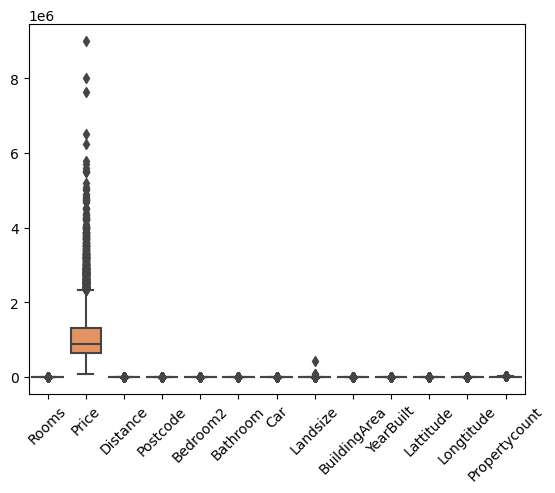

In [66]:
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.show()

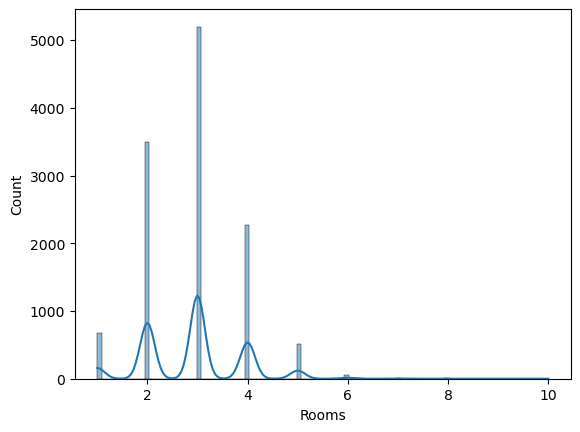

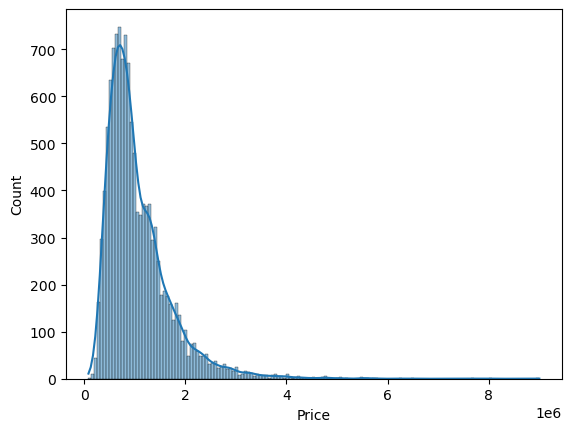

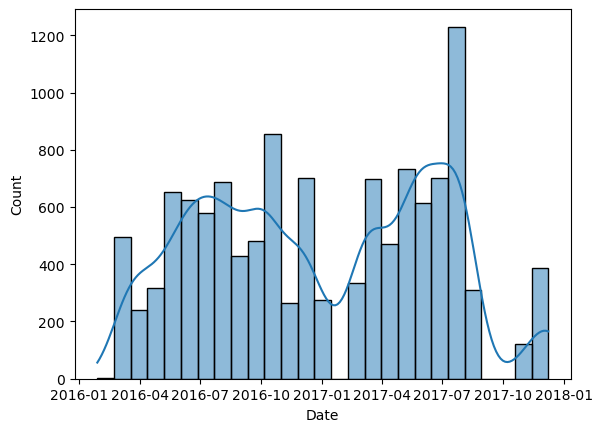

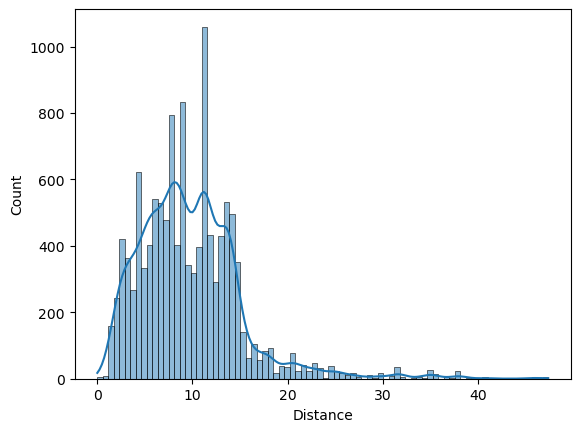

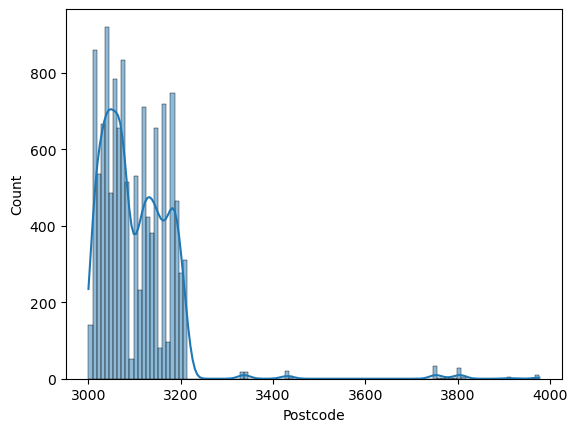

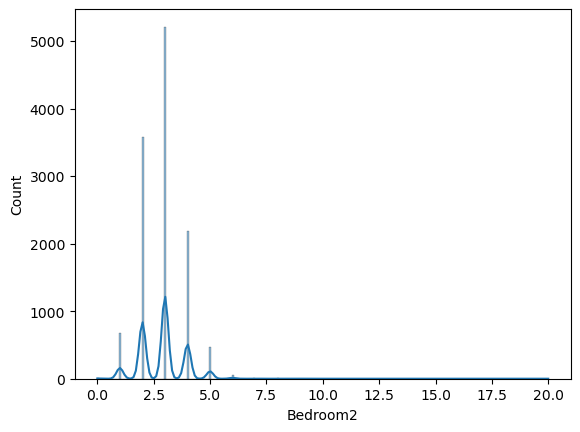

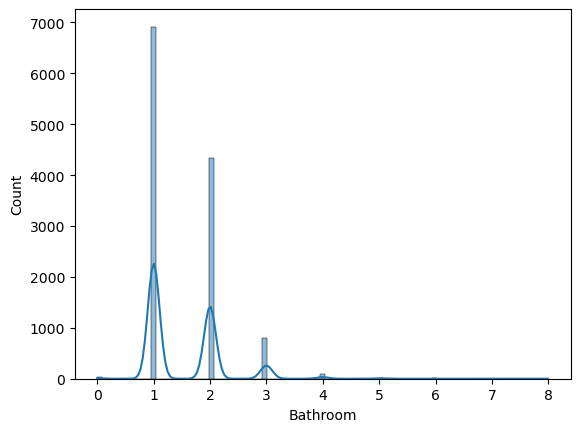

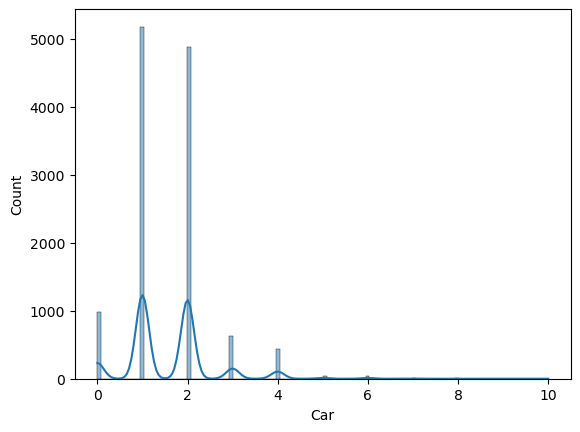

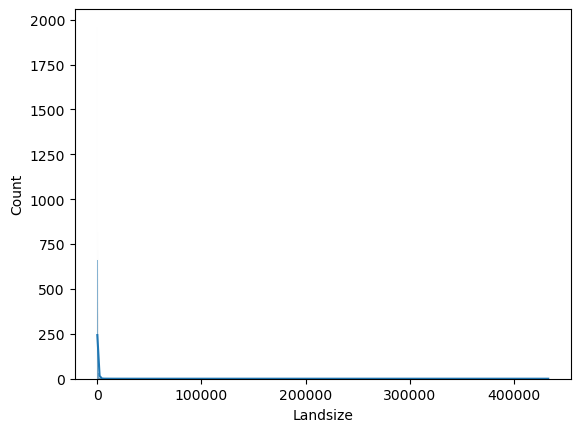

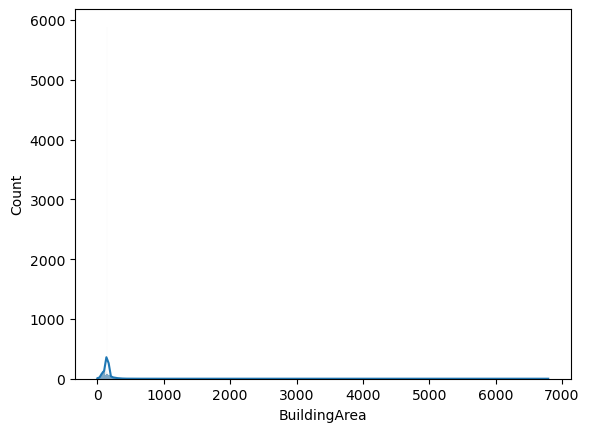

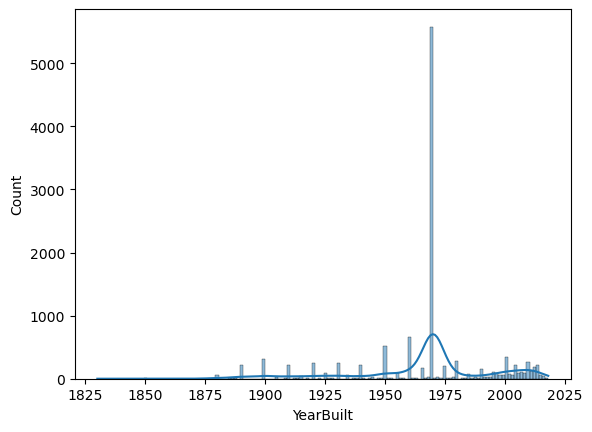

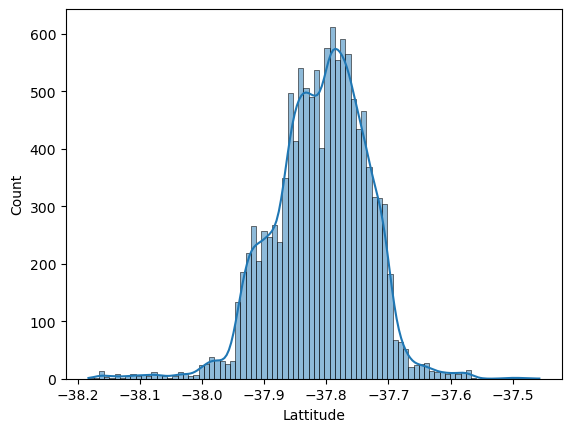

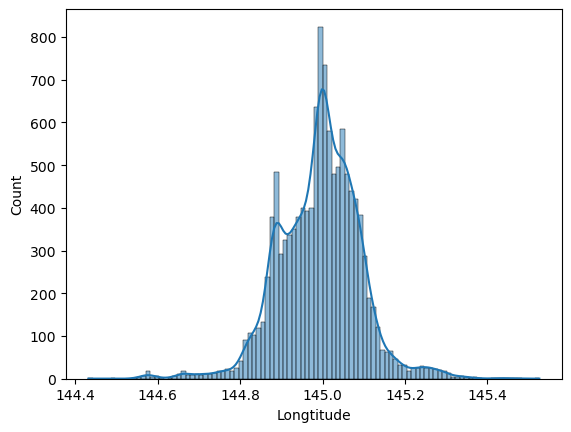

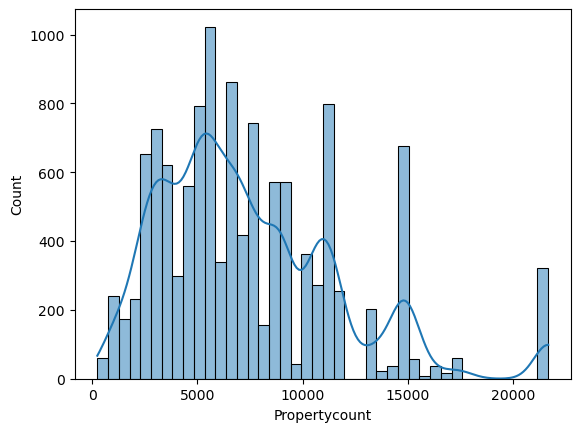

In [67]:
for i in df.select_dtypes(exclude='object'):
    sns.histplot(data=df, x=i, kde=True)
    plt.show()

### 6. SUMMARY
> Summarize the analysis process:
> - Highlight key findings from the descriptive analysis.
> - Highlight any challenges encountered during the analysis and how they were addressed. (optional)
> - Provide potential insights or observations based on the analysis. (optional)

In [68]:
# Grouping the data by suburb and calculating mean price
suburb_prices = df.groupby('Suburb')['Price'].mean()

# Sorting the suburbs based on mean price in descending order
sorted_suburbs = suburb_prices.sort_values(ascending=False)

# Displaying the top and bottom suburbs
top_suburbs = sorted_suburbs.head(5).round(3)
bottom_suburbs = sorted_suburbs.tail(5)

print("Top 5 Suburbs by Mean Price:")
print(top_suburbs)

print("\nBottom 5 Suburbs by Mean Price:")
print(bottom_suburbs)

Top 5 Suburbs by Mean Price:
Suburb
Canterbury     2159176.471
Middle Park    1961806.452
Albert Park    1918414.062
Brighton       1885155.614
Balwyn         1834059.406
Name: Price, dtype: float64

Bottom 5 Suburbs by Mean Price:
Suburb
Dallas           399500.0
Melton South     372550.0
Kurunjang        353000.0
Rockbank         340000.0
Bacchus Marsh    285000.0
Name: Price, dtype: float64


In [69]:
construction_counts = df.groupby(['Suburb', 'YearBuilt']).size().reset_index(name='Count')

max_construction_years = construction_counts.groupby('Suburb').apply(lambda x: x.loc[x['Count'].idxmax()])

result_df = pd.DataFrame(max_construction_years[['Suburb', 'YearBuilt', 'Count']]).sort_values(by='Count', ascending=False)

print("Sorted Result by Count in Descending Order:")
print(result_df)

Sorted Result by Count in Descending Order:
                        Suburb  YearBuilt  Count
Suburb                                          
Reservoir            Reservoir     1970.0    163
Bentleigh East  Bentleigh East     1970.0    121
Preston                Preston     1970.0    111
Essendon              Essendon     1970.0    107
South Yarra        South Yarra     1970.0     98
...                        ...        ...    ...
Diamond Creek    Diamond Creek     1939.0      1
Montrose              Montrose     1980.0      1
Bonbeach              Bonbeach     1970.0      1
Bacchus Marsh    Bacchus Marsh     1970.0      1
Croydon Hills    Croydon Hills     1970.0      1

[308 rows x 3 columns]


In [70]:
import pandas as pd

# Assuming you have loaded your dataset into a Pandas DataFrame called 'df'
# Replace 'RegionName' with the actual column name indicating the region, and 'Price' with the actual column name indicating property prices

# Grouping the data by region and calculating the sum of property prices
region_total_prices = df.groupby('Regionname')['Price'].sum().reset_index(name='TotalPrice')

# Sorting the DataFrame by total price in descending order (optional)
sorted_region_total_prices = region_total_prices.sort_values(by='TotalPrice', ascending=False)

# Formatting TotalPrice as currency
sorted_region_total_prices['TotalPrice'] = sorted_region_total_prices['TotalPrice'].map('${:,.2f}'.format)

# Displaying all regions and their total property prices
print("Regions and Their Total Property Prices:")
print(sorted_region_total_prices)


Regions and Their Total Property Prices:
                   Regionname         TotalPrice
5       Southern Metropolitan  $5,810,034,831.00
2       Northern Metropolitan  $3,186,772,260.00
6        Western Metropolitan  $2,307,651,392.00
0        Eastern Metropolitan  $1,335,678,538.00
4  South-Eastern Metropolitan    $292,997,195.00
1            Eastern Victoria     $30,280,982.00
3           Northern Victoria     $14,553,500.00
7            Western Victoria      $9,572,750.00


In [71]:
import pandas as pd

# Assuming you have loaded your dataset into a Pandas DataFrame called 'df'
# Replace 'Regionname' with the actual column name indicating the region, and 'BuildingArea' with the actual column name indicating building area

# Grouping the data by region and calculating the sum of building area
region_total_building_area = df.groupby('Regionname')['BuildingArea'].sum().reset_index(name='TotalBuildingArea')

# Sorting the DataFrame by total building area in descending order
sorted_region_total_building_area = region_total_building_area.sort_values(by='TotalBuildingArea', ascending=False)

# Displaying all regions and their total accumulated building area
print("Regions and Their Total Accumulated Building Area (Sorted):")
print(sorted_region_total_building_area)

Regions and Their Total Accumulated Building Area (Sorted):
                   Regionname  TotalBuildingArea
5       Southern Metropolitan        660434.1553
2       Northern Metropolitan        484992.9651
6        Western Metropolitan        392891.5400
0        Eastern Metropolitan        201241.9681
4  South-Eastern Metropolitan         50896.6552
1            Eastern Victoria          7511.7800
3           Northern Victoria          4047.2700
7            Western Victoria          3629.0600


In [72]:
suburb_region_mapping = df[['Suburb', 'Regionname']].drop_duplicates()


print("Suburb and Its Respective Region:")
print(suburb_region_mapping)

Suburb and Its Respective Region:
                 Suburb                  Regionname
0            Abbotsford       Northern Metropolitan
38         Airport West        Western Metropolitan
78          Albert Park       Southern Metropolitan
120          Alphington       Northern Metropolitan
141              Altona        Western Metropolitan
...                 ...                         ...
11803  Springvale South  South-Eastern Metropolitan
11868        Yarra Glen           Northern Victoria
11912        Brookfield            Western Victoria
11989           Emerald            Eastern Victoria
12205        Whittlesea           Northern Victoria

[308 rows x 2 columns]


### 7. EXPORT THE CLEANED DATA
> - Export the cleaned data to a CSV file.
>
> - Ensure that the data is formatted correctly for Google Sheets import.

In [73]:
df.to_csv("result/housing_cleaned.csv")